# 总结
这个notebook 是尝试train.csv 文件的，这来自于真实的交易行为

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
csv_path = "./train.csv"
train_set = pd.read_csv(csv_path)

In [2]:
train_set

,date,sym,side,start-time,end-time,volume
0,2023/8/29,000030.SZ,SELL,z 09:30:00,z 09:39:30,184100
1,2023/8/29,000423.SZ,BUY,z 09:30:00,z 09:40:00,9100
2,2023/8/29,000537.SZ,BUY,z 09:30:00,z 09:40:00,25800
3,2023/8/29,000538.SZ,SELL,z 09:30:00,z 09:39:30,31700
4,2023/8/29,000612.SZ,BUY,z 09:30:00,z 09:40:00,86100
...,...,...,...,...,...,...
461,2023/9/4,688685.SH,BUY,z 09:30:00,z 09:40:00,10700
462,2023/9/4,688698.SH,SELL,z 09:30:00,z 09:39:30,4300
463,2023/9/4,688737.SH,BUY,z 09:30:00,z 09:40:00,3800
464,2023/9/4,688772.SH,BUY,z 09:30:00,z 09:40:00,15500


In [14]:
train_sell_set = train_set[train_set['side']=='SELL']
train_sell_set.to_csv('./train_sell.csv')

In [8]:
volume_list = []
for row in train_set.iterrows():
    if row[1]['side'] != 'SELL':
        continue
    date, sym, side, start_time, end_time, volume = adjust_row(row)
    volume_list.append(volume)

(array([203.,  27.,   4.,   4.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([1.00000e+02, 1.19890e+05, 2.39680e+05, 3.59470e+05, 4.79260e+05,
        5.99050e+05, 7.18840e+05, 8.38630e+05, 9.58420e+05, 1.07821e+06,
        1.19800e+06]),
 <BarContainer object of 10 artists>)

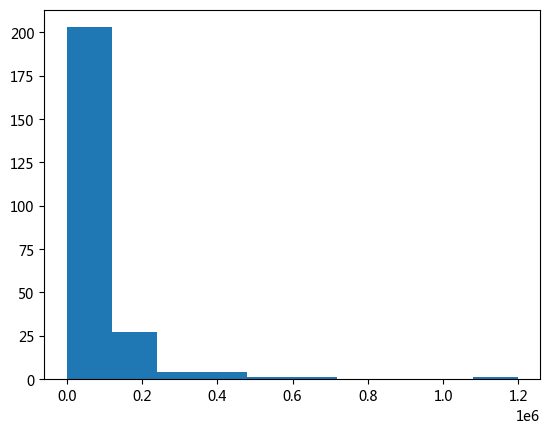

In [12]:
from matplotlib import pyplot as plt
adjust_list = [volume for volume in volume_list if volume < 1e6]
plt.hist(volume_list)


In [4]:
def convert_time_format(time_str):
    # 去掉前面的 'z ' 并去掉冒号
    time_str = time_str[2:].replace(':', '') + '0000'
    # 去掉开头的 '0'
    return time_str.lstrip('0')
def formate_date(date):
    '''
    input: date(example: '2023/8/29')
    output: date(example: '20230829')
    '''
    date_obj = datetime.strptime(date, '%Y/%m/%d')
    formatted_date_str = date_obj.strftime('%Y%m%d')
    return formatted_date_str
def adjust_row(row):
    sample = row[1]
    date = formate_date(sample['date'])
    sym = sample['sym']
    side = sample['side'].lower()
    start_time = convert_time_format(sample['start-time'])
    end_time = convert_time_format(sample['end-time'])
    volume = sample['volume']
    return date, sym, side, start_time, end_time, volume

# command_temple = 'python3 run_bond_momentum_app.py --inst {} --td {} --start_time {} --end_time {} --volume {} --direction {}'
# for i, row_ in enumerate(test_df.iterrows()):
#     # print(row)
#     row = row_[1]
#     date = formate_date(row['date'])
#     sym = row['sym']
#     side = row['side'].lower()
#     start_time = convert_time_format(row['start-time'])
#     end_time = convert_time_format(row['end-time'])
#     volume = row['volume']
#     print(date, sym, side, start_time, end_time, volume)
#     command = command_temple.format(sym, date, start_time, end_time, volume, side)
#     print(command)
#     result = subprocess.run(command, shell=True, capture_output=True, text=True)
#     print(result)
#     if i > 2: 
#         break